# Computer vision data

In [ ]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai import * 
from fastai.vision import * 

This module contains the classes that define datasets handling [`Image`](/vision.image.html#Image) objects and their tranformations. As usual, we'll start with a quick overview, before we get in to the detailed API docs.

## Quickly get your data ready for training

To get you started as easily as possible, the fastai provides two helper functions to create a [`DataBunch`](/basic_data.html#DataBunch) object that you can directly use for training a classifier. To demonstrate them you'll first need to download and untar the file by executing the following cell. This will create a data folder containing an MNIST subset in `data/mnist_sample`.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/.fastai/data/mnist_sample')

There are a number of ways to create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch). One common approach is to use *Imagenet-style folders* (see a ways down the page below for details) with [`ImageDataBunch.from_folder`](/vision.data.html#ImageDataBunch.from_folder):

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Here the datasets will be automatically created in the structure of *Imagenet-style folders*. The parameters specified:
- the transforms to apply to the images in `ds_tfms` (here with `do_flip`=False because we don't want to flip numbers),
- the target `size` of our pictures (here 24).

As with all [`DataBunch`](/basic_data.html#DataBunch) usage,  a `train_dl` and a `valid_dl` are created that are of the type PyTorch [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). 

If you want to have a look at a few images inside a batch, you can use [`ImageDataBunch.show_batch`](/vision.data.html#ImageDataBunch.show_batch). The `rows` argument is the number of rows and columns to display.

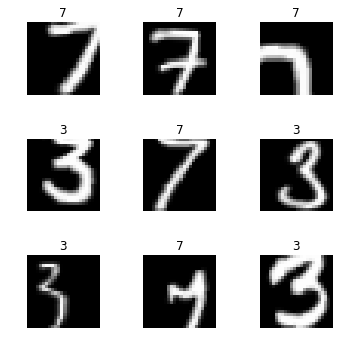

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

The second way to define the data for a classifier requires a structure like this:
```
path\
  train\
  test\
  labels.csv
```
where the labels.csv file defines the label(s) of each image in the training set. This is the format you will need to use when each image can have multiple labels. It also works with single labels:

In [ ]:
pd.read_csv(path/'labels.csv').head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


You can then use [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv):

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

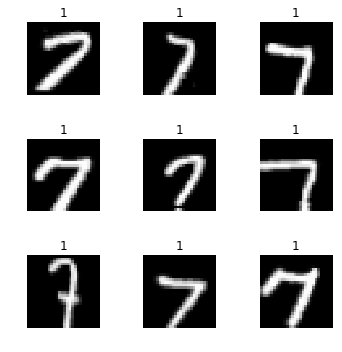

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

An example of multiclassification can be downloaded with the following cell. It's a sample of the [planet dataset](https://www.google.com/search?q=kaggle+planet&rlz=1C1CHBF_enFR786FR786&oq=kaggle+planet&aqs=chrome..69i57j0.1563j0j7&sourceid=chrome&ie=UTF-8).

In [ ]:
planet = untar_data(URLs.PLANET_SAMPLE)

If we open the labels files, we seach that each image has one or more tags, separated by a space.

In [ ]:
df =pd.read_csv(planet/'labels.csv')
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [ ]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', sep=' ',
    ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

The `show_batch`method will then print all the labels that correspond to each image.

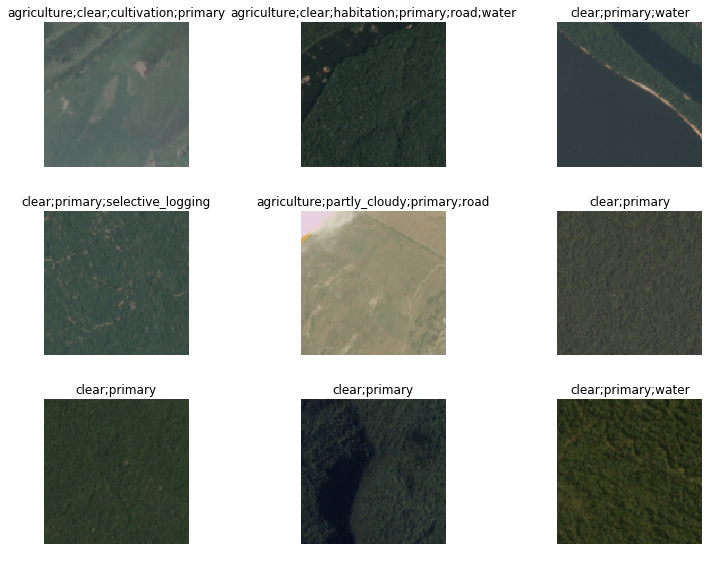

In [ ]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

You can find more ways to build an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) without the factory methods in [`data_block`](/data_block.html#data_block).

In [ ]:
show_doc(ImageDataBunch, doc_string=False)

<h2 id="ImageDataBunch"><code>class</code> <code>ImageDataBunch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L94" class="source_link">[source]</a></h2>

> <code>ImageDataBunch</code>(`train_dl`:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), `valid_dl`:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), `test_dl`:`Optional`\[[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)\]=`None`, `device`:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=`None`, `tfms`:`Optional`\[`Collection`\[`Callable`\]\]=`None`, `path`:`PathOrStr`=`'.'`, `collate_fn`:`Callable`=`'data_collate'`) :: [`DataBunch`](/basic_data.html#DataBunch)

### Factory methods

Normally we'll use one of the convenience wrappers below. However, these wrappers all accept a `kwargs` that is passed to the general [`DataBunch.create`](/basic_data.html#DataBunch.create) method (like `bs`, `num_workers`...)

If you quickly want to get a [`ImageDataBunch`](/vision.data.html#ImageDataBunch) and train a model, you should process your data to have it in one of the formats the following functions handle. 

In [ ]:
show_doc(ImageDataBunch.from_folder)

<h4 id="ImageDataBunch.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L107" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`path`:`PathOrStr`, `train`:`PathOrStr`=`'train'`, `valid`:`PathOrStr`=`'valid'`, `valid_pct`=`None`, `classes`:`Collection`\[`T_co`\]=`None`, `kwargs`:`Any`) → `ImageDataBunch`

Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).  

"*Imagenet-style*" datasets look something like this (note that the test folder is optional):

```
path\
  train\
    clas1\
    clas2\
    ...
  valid\
    clas1\
    clas2\
    ...
  test\
```

For example:

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Note that this (and all factory methods in this section) pass any `kwargs` to [`ImageDataBunch.create`](/vision.data.html#ImageDataBunch.create).

In [ ]:
show_doc(ImageDataBunch.from_csv)

<h4 id="ImageDataBunch.from_csv"><code>from_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L128" class="source_link">[source]</a></h4>

> <code>from_csv</code>(`path`:`PathOrStr`, `folder`:`PathOrStr`=`'.'`, `sep`=`None`, `csv_labels`:`PathOrStr`=`'labels.csv'`, `valid_pct`:`float`=`0.2`, `fn_col`:`int`=`0`, `label_col`:`int`=`1`, `suffix`:`str`=`''`, `header`:`Union`\[`int`, `str`, `NoneType`\]=`'infer'`, `kwargs`:`Any`) → `ImageDataBunch`

Create from a csv file in `path/csv_labels`.  

Create [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `path` by splitting the data in `folder` and labelled in a file `csv_labels` between a training and validation set. Use `valid_pct` to indicate the percentage of the total images for the validation set. An optional `test` folder contains unlabelled data and `suffix` contains an optional suffix to add to the filenames in `csv_labels` (such as '.jpg'). 
For example:

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=24);

In [ ]:
show_doc(ImageDataBunch.from_df)

<h4 id="ImageDataBunch.from_df"><code>from_df</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L118" class="source_link">[source]</a></h4>

> <code>from_df</code>(`path`:`PathOrStr`, `df`:`DataFrame`, `folder`:`PathOrStr`=`'.'`, `sep`=`None`, `valid_pct`:`float`=`0.2`, `fn_col`:`Union`\[`int`, `Collection`\[`int`\], `str`, `StrList`\]=`0`, `label_col`:`Union`\[`int`, `Collection`\[`int`\], `str`, `StrList`\]=`1`, `suffix`:`str`=`''`, `kwargs`:`Any`) → `ImageDataBunch`

Create from a `DataFrame` `df`.  

Same as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), but passing in a `DataFrame` instead of a csv file. E.gL

In [ ]:
df = pd.read_csv(path/'labels.csv', header='infer')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)

Different datasets are labeled in many different ways. The following methods can help extract the labels from the dataset in a wide variety of situations. The way they are built in fastai is constructive: there are methods which do a lot for you but apply in specific circumstances and there are methods which do less for you but give you more flexibility.

In this case the hierachy is:

1. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re): Gets the labels from the filenames using a regular expression
2. [`ImageDataBunch.from_name_func`](/vision.data.html#ImageDataBunch.from_name_func): Gets the labels from the filenames using any function
3. [`ImageDataBunch.from_lists`](/vision.data.html#ImageDataBunch.from_lists): Labels need to be provided as an input in a list

In [ ]:
show_doc(ImageDataBunch.from_name_re)

<h4 id="ImageDataBunch.from_name_re"><code>from_name_re</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L150" class="source_link">[source]</a></h4>

> <code>from_name_re</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `pat`:`str`, `valid_pct`:`float`=`0.2`, `kwargs`)

Create from list of `fnames` in `path` with re expression `pat`.  

Creates an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `fnames`, calling a regular expression (containing one *re group*) on the file names to get the labels, putting aside `valid_pct` for the validation. In the same way as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), an optional `test` folder contains unlabelled data.

Our previously created dataframe contains the labels in the filenames so we can leverage it to test this new method. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re) needs the exact path of each file so we will append the data path to each filename before creating our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object.

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)

In [ ]:
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_name_func)

<h4 id="ImageDataBunch.from_name_func"><code>from_name_func</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L144" class="source_link">[source]</a></h4>

> <code>from_name_func</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `label_func`:`Callable`, `valid_pct`:`float`=`0.2`, `kwargs`)

Create from list of `fnames` in `path` with `label_func`.  

Works in the same way as [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re), but instead of a regular expression it expects a function that will determine how to extract the labels from the filenames. (Note that `from_name_re` uses this function in its implementation).

To test it we could build a function with our previous regex. Let's try another, similar approach to show that the labels can be obtained in a different way.

In [ ]:
def get_labels(file_path): return '3' if '/3/' in str(file_path) else '7'
data = ImageDataBunch.from_name_func(path, fn_paths, label_func=get_labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_lists)

<h4 id="ImageDataBunch.from_lists"><code>from_lists</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L138" class="source_link">[source]</a></h4>

> <code>from_lists</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `labels`:`StrList`, `valid_pct`:`float`=`0.2`, `kwargs`)

Create from list of `fnames` in `path`.  

The most flexible factory function; pass in a list of `labels` that correspond to each of the filenames in `fnames`.

To show an example we have to build the labels list outside our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object and give it as an argument when we call `from_lists`. Let's use our previously created function to create our labels list.

In [ ]:
labels_ls = list(map(get_labels, fn_paths))
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels_ls, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.create_from_ll)

<h4 id="ImageDataBunch.create_from_ll"><code>create_from_ll</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L98" class="source_link">[source]</a></h4>

> <code>create_from_ll</code>(`lls`:[`LabelLists`](/data_block.html#LabelLists), `bs`:`int`=`64`, `ds_tfms`:`Union`\[`Callable`, `Collection`\[`Callable`\], `NoneType`\]=`None`, `num_workers`:`int`=`4`, `tfms`:`Optional`\[`Collection`\[`Callable`\]\]=`None`, `device`:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=`None`, `test`:`Union`\[`Path`, `str`, `NoneType`\]=`None`, `collate_fn`:`Callable`=`'data_collate'`, `size`:`int`=`None`, `kwargs`) → `ImageDataBunch`

Create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from [`LabelLists`](/data_block.html#LabelLists) `lls` with potential `ds_tfms`.  

Create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `dss` with `bs`, `num_workers`, `collate_fn` and a potential `test` folder. `ds_tfms` is a tuple of two lists of transforms to be applied to the training and the validation (plus test optionally) set. `tfms` are the transforms to apply to the [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). The `size` and the `kwargs` are passed to the transforms for data augmentation.

### Methods

In [ ]:
show_doc(ImageDataBunch.show_batch)

<h4 id="DataBunch.show_batch"><code>show_batch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/basic_data.py#L149" class="source_link">[source]</a></h4>

> <code>show_batch</code>(`rows`:`int`=`5`, `ds_type`:[`DatasetType`](/basic_data.html#DatasetType)=`<DatasetType.Train: 1>`, `kwargs`)

Show a batch of data in `ds_type` on a few `rows`.  

Create a `rows` by `rows` grid of images from dataset `ds_type` for a `figsize` figure. This function works for all type of computer vision data (see [`data_block`](/data_block.html#data_block) for more examples).

Once you have your [`ImageDataBunch`](/vision.data.html#ImageDataBunch), you can have a quick look at your data by using this:

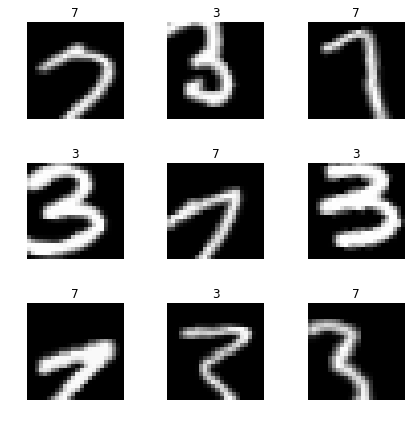

In [ ]:
data.show_batch(rows=3, figsize=(6,6))

In the next two methods we will use a new dataset, CIFAR. This is because the second method will get the statistics for our dataset and we want to be able to show different statistics per channel. If we were to use MNIST, these statistics would be the same for every channel. White pixels are [255,255,255] and black pixels are [0,0,0] (or in normalized form [1,1,1] and [0,0,0]) so there is no variance between channels.

In [ ]:
path = untar_data(URLs.CIFAR); path

PosixPath('/home/ubuntu/.fastai/data/cifar10')

In [ ]:
show_doc(channel_view)

<h4 id="channel_view"><code>channel_view</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L90" class="source_link">[source]</a></h4>

> <code>channel_view</code>(`x`:`Tensor`) → `Tensor`

Make channel the first axis of `x` and flatten remaining axes  

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=24)

In [ ]:
def channel_view(x:Tensor)->Tensor:
    "Make channel the first axis of `x` and flatten remaining axes"
    return x.transpose(0,1).contiguous().view(x.shape[1],-1) 

This function takes a tensor and flattens all dimensions except the channels, which it keeps as the first axis. This function is used to feed [`ImageDataBunch.batch_stats`](/vision.data.html#ImageDataBunch.batch_stats) so that it can get the pixel statistics of a whole batch.

Let's take as an example the dimensions our MNIST batches: 128, 3, 24, 24.

In [ ]:
t = torch.Tensor(128, 3, 24, 24)

In [ ]:
t.size()

torch.Size([128, 3, 24, 24])

In [ ]:
tensor = channel_view(t)

In [ ]:
tensor.size()

torch.Size([3, 73728])

In [ ]:
show_doc(ImageDataBunch.batch_stats)

<h4 id="ImageDataBunch.batch_stats"><code>batch_stats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L163" class="source_link">[source]</a></h4>

> <code>batch_stats</code>(`funcs`:`Collection`\[`Callable`\]=`None`) → `Tensor`

Grab a batch of data and call reduction function `func` per channel  

Gets the statistics of each channel of a batch of data. If no functions are specified, default statistics are mean and standard deviation. 

In [ ]:
data.batch_stats()

[tensor([0.4928, 0.4767, 0.4671]), tensor([0.2677, 0.2631, 0.2630])]

In [ ]:
show_doc(ImageDataBunch.normalize)

<h4 id="ImageDataBunch.normalize"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L169" class="source_link">[source]</a></h4>

> <code>normalize</code>(`stats`:`Collection`\[`Tensor`\]=`None`, `do_x`:`bool`=`True`, `do_y`:`bool`=`False`)

Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)  

Adds the normalize transform to the set of transforms associated with the data. In the fast.ai library we have `imagenet_stats`, `cifar_stats` and `mnist_stats` so we can add normalization easily with any of these datasets. Let's see an example with our dataset of choice: MNIST.

In [ ]:
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (50000 items)
[Category truck, Category truck, Category truck, Category truck, Category truck]...
Path: /home/ubuntu/.fastai/data/cifar10
x: ImageItemList (50000 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /home/ubuntu/.fastai/data/cifar10;

Valid: LabelList
y: CategoryList (10000 items)
[Category truck, Category truck, Category truck, Category truck, Category truck]...
Path: /home/ubuntu/.fastai/data/cifar10
x: ImageItemList (10000 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /home/ubuntu/.fastai/data/cifar10;

Test: None

In [ ]:
data.batch_stats()

[tensor([ 0.0074, -0.0219,  0.0769]), tensor([1.0836, 1.0829, 1.0078])]

## Data normalization

You may also want to normalize your data, which can be done by using the following functions.

In [ ]:
show_doc(normalize)

<h4 id="normalize"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L64" class="source_link">[source]</a></h4>

> <code>normalize</code>(`x`:`Tensor`, `mean`:`FloatTensor`, `std`:`FloatTensor`) → `Tensor`

Normalize `x` with `mean` and `std`.  

In [ ]:
show_doc(denormalize)

<h4 id="denormalize"><code>denormalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L68" class="source_link">[source]</a></h4>

> <code>denormalize</code>(`x`:`Tensor`, `mean`:`FloatTensor`, `std`:`FloatTensor`, `do_x`:`bool`=`True`) → `Tensor`

Denormalize `x` with `mean` and `std`.  

In [ ]:
show_doc(normalize_funcs, doc_string=False)

<h4 id="normalize_funcs"><code>normalize_funcs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L80" class="source_link">[source]</a></h4>

> <code>normalize_funcs</code>(`mean`:`FloatTensor`, `std`:`FloatTensor`, `do_x`:`bool`=`True`, `do_y`:`bool`=`False`) → `Tuple`\[`Callable`, `Callable`\]

Create [`normalize`](/vision.data.html#normalize) and [`denormalize`](/vision.data.html#denormalize) functions using `mean` and `std`. `device` will store them on the device specified. `do_y` determines if the target should also be normaized or not.

On MNIST the mean and std are 0.1307 and 0.3081 respectively (looked on Google). If you're using a pretrained model, you'll need to use the normalization that was used to train the model. The imagenet norm and denorm functions are stored as constants inside the library named <code>imagenet_norm</code> and <code>imagenet_denorm</code>. If you're training a model on CIFAR-10, you can also use <code>cifar_norm</code> and <code>cifar_denorm</code>.

You may sometimes see warnings about *clipping input data* when plotting normalized data. That's because even although it's denormalized when plotting automatically, sometimes floating point errors may make some values slightly out or the correct range. You can safely ignore these warnings in this case.

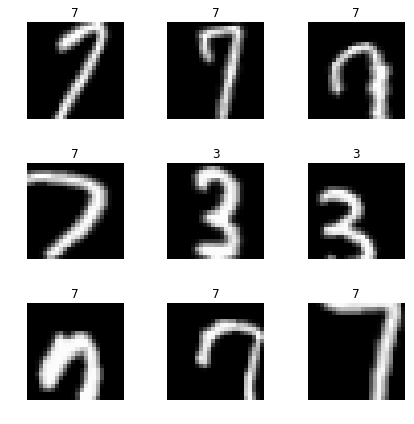

In [ ]:
data = ImageDataBunch.from_folder(untar_data(URLs.MNIST_SAMPLE),
                                  ds_tfms=tfms, size=24)
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

In [ ]:
show_doc(get_annotations)

<h4 id="get_annotations"><code>get_annotations</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L23" class="source_link">[source]</a></h4>

> <code>get_annotations</code>(`fname`, `prefix`=`None`)

Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes.  

To use this dataset and collate samples into batches, you'll need to following function:

In [ ]:
show_doc(bb_pad_collate)

<h4 id="bb_pad_collate"><code>bb_pad_collate</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L40" class="source_link">[source]</a></h4>

> <code>bb_pad_collate</code>(`samples`:`BatchSamples`, `pad_idx`:`int`=`0`) → `Tuple`\[`FloatTensor`, `Tuple`\[`LongTensor`, `LongTensor`\]\]

Function that collect `samples` of labelled bboxes and adds padding with `pad_idx`.  

Finally, to apply transformations to [`Image`](/vision.image.html#Image) in a [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), we use this last class.

## ItemList specific to vision

The vision application adds a few subclasses of [`ItemList`](/data_block.html#ItemList) specific to images.

In [ ]:
show_doc(ImageItemList, title_level=3)

<h3 id="ImageItemList"><code>class</code> <code>ImageItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L251" class="source_link">[source]</a></h3>

> <code>ImageItemList</code>(`args`, `convert_mode`=`'RGB'`, `kwargs`) :: [`ItemList`](/data_block.html#ItemList)

[`ItemList`](/data_block.html#ItemList) suitable for computre vision.  

Create a [`ItemList`](/data_block.html#ItemList) in `path` from filenames in `items`. `create_func` will default to [`open_image`](/vision.image.html#open_image). `label_cls` can be specified for the labels, `xtra` contains any extra information (usually in the form of a dataframe) and `processor` is applied to the [`ItemList`](/data_block.html#ItemList) after splitting and labelling.

In [ ]:
show_doc(ImageItemList.from_folder)

<h4 id="ImageItemList.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L270" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`path`:`PathOrStr`=`'.'`, `extensions`:`StrList`=`None`, `kwargs`) → [`ItemList`](/data_block.html#ItemList)

Get the list of files in `path` that have an image suffix. `recurse` determines if we search subfolders.  

In [ ]:
show_doc(ImageItemList.from_df)

<h4 id="ImageItemList.from_df"><code>from_df</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L276" class="source_link">[source]</a></h4>

> <code>from_df</code>(`df`:`DataFrame`, `path`:`PathOrStr`, `cols`:`Union`\[`int`, `Collection`\[`int`\], `str`, `StrList`\]=`0`, `folder`:`PathOrStr`=`'.'`, `suffix`:`str`=`''`, `kwargs`) → `ItemList`

Get the filenames in `col` of `df` and will had `path/folder` in front of them, `suffix` at the end.  

In [ ]:
show_doc(get_image_files)

<h4 id="get_image_files"><code>get_image_files</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L19" class="source_link">[source]</a></h4>

> <code>get_image_files</code>(`c`:`PathOrStr`, `check_ext`:`bool`=`True`, `recurse`=`False`) → `FilePathList`

Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.  

In [ ]:
show_doc(ImageItemList.open)

<h4 id="ImageItemList.open"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L260" class="source_link">[source]</a></h4>

> <code>open</code>(`fn`)

Open image in `fn`, subclass and overwrite for custom behavior.  

Open the image in `fn`. Subclass and overwrite this function if you want to use a custom opening function.

In [ ]:
show_doc(ImageItemList.show_xys)

<h4 id="ImageItemList.show_xys"><code>show_xys</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L294" class="source_link">[source]</a></h4>

> <code>show_xys</code>(`xs`, `ys`, `imgsize`:`int`=`4`, `figsize`:`Optional`\[`Tuple`\[`int`, `int`\]\]=`None`, `kwargs`)

Show the `xs` (inputs) and `ys` (targets) on a figure of `figsize`.  

In [ ]:
show_doc(ImageItemList.show_xyzs)

<h4 id="ImageItemList.show_xyzs"><code>show_xyzs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L302" class="source_link">[source]</a></h4>

> <code>show_xyzs</code>(`xs`, `ys`, `zs`, `imgsize`:`int`=`4`, `figsize`:`Optional`\[`Tuple`\[`int`, `int`\]\]=`None`, `kwargs`)

Show `xs` (inputs), `ys` (targets) and `zs` (predictions) on a figure of `figsize`.  

In [ ]:
show_doc(ObjectCategoryList, title_level=3)

<h3 id="ObjectCategoryList"><code>class</code> <code>ObjectCategoryList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L336" class="source_link">[source]</a></h3>

> <code>ObjectCategoryList</code>(`items`:`Iterator`\[`T_co`\], `classes`:`Collection`\[`T_co`\]=`None`, `sep`:`str`=`None`, `kwargs`) :: [`MultiCategoryList`](/data_block.html#MultiCategoryList)

[`ItemList`](/data_block.html#ItemList) for labelled bounding boxes.  

In [ ]:
show_doc(ObjectItemList, title_level=3)

<h3 id="ObjectItemList"><code>class</code> <code>ObjectItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L350" class="source_link">[source]</a></h3>

> <code>ObjectItemList</code>(`args`, `convert_mode`=`'RGB'`, `kwargs`) :: [`ImageItemList`](/vision.data.html#ImageItemList)

[`ItemList`](/data_block.html#ItemList) suitable for object detection.  

In [ ]:
show_doc(SegmentationItemList, title_level=3)

<h3 id="SegmentationItemList"><code>class</code> <code>SegmentationItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L373" class="source_link">[source]</a></h3>

> <code>SegmentationItemList</code>(`args`, `convert_mode`=`'RGB'`, `kwargs`) :: [`ImageItemList`](/vision.data.html#ImageItemList)

[`ItemList`](/data_block.html#ItemList) suitable for segmentation tasks.  

In [ ]:
show_doc(SegmentationLabelList, title_level=3)

<h3 id="SegmentationLabelList"><code>class</code> <code>SegmentationLabelList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L359" class="source_link">[source]</a></h3>

> <code>SegmentationLabelList</code>(`items`:`Iterator`\[`T_co`\], `classes`:`Collection`\[`T_co`\]=`None`, `kwargs`) :: [`ImageItemList`](/vision.data.html#ImageItemList)

[`ItemList`](/data_block.html#ItemList) for segmentation masks.  

In [ ]:
show_doc(PointsItemList, title_level=3)

<h3 id="PointsItemList"><code>class</code> <code>PointsItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L382" class="source_link">[source]</a></h3>

> <code>PointsItemList</code>(`items`:`Iterator`\[`T_co`\], `path`:`PathOrStr`=`'.'`, `label_cls`:`Callable`=`None`, `xtra`:`Any`=`None`, `processor`:[`PreProcessor`](/data_block.html#PreProcessor)=`None`, `x`:`ItemList`=`None`, `kwargs`) :: [`ItemList`](/data_block.html#ItemList)

[`ItemList`](/data_block.html#ItemList) for points.  

In [ ]:
show_doc(ImageImageList, title_level=3)

<h3 id="ImageImageList"><code>class</code> <code>ImageImageList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L395" class="source_link">[source]</a></h3>

> <code>ImageImageList</code>(`args`, `convert_mode`=`'RGB'`, `kwargs`) :: [`ImageItemList`](/vision.data.html#ImageItemList)

[`ItemList`](/data_block.html#ItemList) suitable for [`Image`](/vision.image.html#Image) to [`Image`](/vision.image.html#Image) tasks.  

## Building your own dataset

This module also contains a few helper functions to allow you to build you own dataset for image classification.

In [ ]:
show_doc(download_images)

<h4 id="download_images"><code>download_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L187" class="source_link">[source]</a></h4>

> <code>download_images</code>(`urls`:`StrList`, `dest`:`PathOrStr`, `max_pics`:`int`=`1000`, `max_workers`:`int`=`8`, `timeout`=`4`)

Download images listed in text file `urls` to path `dest`, at most `max_pics`  

In [ ]:
show_doc(verify_images)

<h4 id="verify_images"><code>verify_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L238" class="source_link">[source]</a></h4>

> <code>verify_images</code>(`path`:`PathOrStr`, `delete`:`bool`=`True`, `max_workers`:`int`=`4`, `max_size`:`int`=`None`, `dest`:`PathOrStr`=`'.'`, `n_channels`:`int`=`3`, `interp`=`2`, `ext`:`str`=`None`, `img_format`:`str`=`None`, `resume`:`bool`=`None`, `kwargs`)

Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.  

It will try if every image in this folder can be opened and has `n_channels`. If `n_channels` is 3 – it'll try to convert image to RGB. If `delete=True`, it'll be removed it this fails. If `resume` – it will skip already existent images in `dest`.  If `max_size` is specifided, image is resized to the same ratio so that both sizes are less than `max_size`, using `interp`. Result is stored in `dest`, `ext` forces an extension type, `img_format` and `kwargs` are passed to PIL.Image.save. Use `max_workers` CPUs.

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(PointsItemList.get)

<h4 id="PointsItemList.get"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L388" class="source_link">[source]</a></h4>

> <code>get</code>(`i`)

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(SegmentationLabelList.new)

<h4 id="SegmentationLabelList.new"><code>new</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L366" class="source_link">[source]</a></h4>

> <code>new</code>(`items`, `classes`=`None`, `kwargs`)

Create a new [`ItemList`](/data_block.html#ItemList) from `items`, keeping the same attributes.  

In [ ]:
show_doc(ImageItemList.from_csv)

<h4 id="ImageItemList.from_csv"><code>from_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L285" class="source_link">[source]</a></h4>

> <code>from_csv</code>(`path`:`PathOrStr`, `csv_name`:`str`, `header`:`str`=`'infer'`, `kwargs`) → `ItemList`

Get the filenames in `path/csv_name` opened with `header`.  

In [ ]:
show_doc(ObjectCategoryList.get)

<h4 id="ObjectCategoryList.get"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L340" class="source_link">[source]</a></h4>

> <code>get</code>(`i`)

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(ImageItemList.get)

<h4 id="ImageItemList.get"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L264" class="source_link">[source]</a></h4>

> <code>get</code>(`i`)

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(SegmentationLabelList.reconstruct)

<h4 id="SegmentationLabelList.reconstruct"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L371" class="source_link">[source]</a></h4>

> <code>reconstruct</code>(`t`:`Tensor`)

Reconstuct one of the underlying item for its data `t`.  

In [ ]:
show_doc(ImageImageList.show_xys)

<h4 id="ImageImageList.show_xys"><code>show_xys</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L400" class="source_link">[source]</a></h4>

> <code>show_xys</code>(`xs`, `ys`, `imgsize`:`int`=`4`, `figsize`:`Optional`\[`Tuple`\[`int`, `int`\]\]=`None`, `kwargs`)

Show the `xs` (inputs) and `ys`(targets)  on a figure of `figsize`.  

In [ ]:
show_doc(ImageImageList.show_xyzs)

<h4 id="ImageImageList.show_xyzs"><code>show_xyzs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L408" class="source_link">[source]</a></h4>

> <code>show_xyzs</code>(`xs`, `ys`, `zs`, `imgsize`:`int`=`4`, `figsize`:`Optional`\[`Tuple`\[`int`, `int`\]\]=`None`, `kwargs`)

Show `xs` (inputs), `ys` (targets) and `zs` (predictions) on a figure of `figsize`.  

In [ ]:
show_doc(ImageItemList.open)

<h4 id="ImageItemList.open"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L260" class="source_link">[source]</a></h4>

> <code>open</code>(`fn`)

Open image in `fn`, subclass and overwrite for custom behavior.  

In [ ]:
show_doc(PointsItemList.analyze_pred)

<h4 id="PointsItemList.analyze_pred"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L392" class="source_link">[source]</a></h4>

> <code>analyze_pred</code>(`pred`, `thresh`:`float`=`0.5`)

Called on `pred` before `reconstruct` for additional preprocessing.  

In [ ]:
show_doc(SegmentationLabelList.analyze_pred)

<h4 id="SegmentationLabelList.analyze_pred"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L370" class="source_link">[source]</a></h4>

> <code>analyze_pred</code>(`pred`, `thresh`:`float`=`0.5`)

Called on `pred` before `reconstruct` for additional preprocessing.  

In [ ]:
show_doc(PointsItemList.reconstruct)

<h4 id="PointsItemList.reconstruct"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L393" class="source_link">[source]</a></h4>

> <code>reconstruct</code>(`t`, `x`)

Reconstuct one of the underlying item for its data `t`.  

In [ ]:
show_doc(SegmentationLabelList.open)

<h4 id="SegmentationLabelList.open"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L369" class="source_link">[source]</a></h4>

> <code>open</code>(`fn`)

Open image in `fn`, subclass and overwrite for custom behavior.  

In [ ]:
show_doc(ImageItemList.reconstruct)

<h4 id="ImageItemList.reconstruct"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L292" class="source_link">[source]</a></h4>

> <code>reconstruct</code>(`t`:`Tensor`)

Reconstuct one of the underlying item for its data `t`.  

In [ ]:
show_doc(resize_to)

<h4 id="resize_to"><code>resize_to</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L194" class="source_link">[source]</a></h4>

> <code>resize_to</code>(`img`, `targ_sz`:`int`, `use_min`:`bool`=`False`)

Size to resize to, to hit `targ_sz` at same aspect ratio, in PIL coords (i.e w*h)  

In [ ]:
show_doc(ObjectCategoryList.reconstruct)

<h4 id="ObjectCategoryList.reconstruct"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L343" class="source_link">[source]</a></h4>

> <code>reconstruct</code>(`t`, `x`)

Reconstuct one of the underlying item for its data `t`.  

## New Methods - Please document or move to the undocumented section